In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2 as cv

file_name = "08"
img = cv.imread("imgs/"+file_name+".jpg")
random.seed(11)

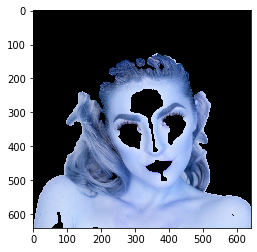

In [2]:
# 피부 검출1
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")

converted = cv.cvtColor(img, cv.COLOR_BGR2HSV)
skinMask = cv.inRange(converted, lower, upper)

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (11,11))
skinMask = cv.erode(skinMask, kernel, iterations = 2)
skinMask = cv.dilate(skinMask, kernel, iterations = 2)

skinMask = cv.GaussianBlur(skinMask, (3,3), 0)
skin = cv.bitwise_and(img, img, mask = skinMask)

result = skin
# view_img = np.hstack([img, skin])
plt.imshow(result)
plt.show()

C:\Users\user\anaconda3\envs\GAN\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in ubyte_scalars


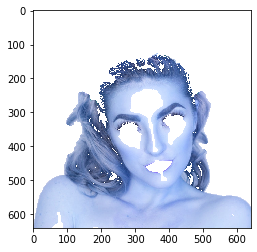

In [3]:
# 피부 검출2
img = cv.cvtColor(result, cv.COLOR_BGR2HLS)
skin_img = img
temp_img = cv.cvtColor(img, cv.COLOR_HLS2RGB)

h, w, c = img.shape


for i in range(h) :
    for j in range(w) :
        H = img[i][j][0]
        L = img[i][j][1]
        S = img[i][j][2]
        
        R = temp_img[i][j][0]
        G = temp_img[i][j][1]
        B = temp_img[i][j][2]
        
        LS_ratio = L/S
        skin_pixel = bool((S>=50) and (LS_ratio > 0.5) and (LS_ratio < 3.0) and ((H <= 25) or (H >= 165)))
        temp_pixel = bool((R == G) and (G == B) and (R >= 220))
                
        if skin_pixel :
            if temp_pixel :
                skin_img[i][j][0] = 0
                skin_img[i][j][1] = 0
                skin_img[i][j][2] = 0
            else :
                pass
        else :
            skin_img[i][j][0] = 0
            skin_img[i][j][1] = 0
            skin_img[i][j][2] = 0
        
        
        

skin_img = cv.cvtColor(skin_img, cv.COLOR_HLS2BGR)            
for i in range(h) :
    for j in range(w) :
        B = skin_img[i][j][0]
        G = skin_img[i][j][1]
        R = skin_img[i][j][2]

        bg_pixel = bool(B==0 and G==0 and R==0)
        
        if bg_pixel :
            skin_img[i][j][0] = 255
            skin_img[i][j][1] = 255
            skin_img[i][j][2] = 255
        else :
            pass
        
        
plt.imshow(skin_img)
plt.show()

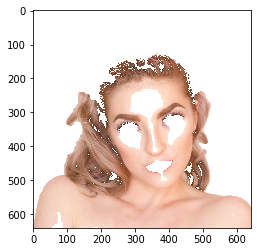

KMeans(n_clusters=20)

In [4]:
from sklearn.cluster import KMeans

cvt_img = cv.cvtColor(skin_img, cv.COLOR_BGR2RGB)
plt.imshow(cvt_img)
plt.show()

cvt_img = cvt_img.reshape((cvt_img.shape[0]*cvt_img.shape[1], 3))
k = 20
clt = KMeans(n_clusters=k)
clt.fit(cvt_img)

In [5]:
def color_ratio(clt) :
    numLabels = np.arange(0, len(np.unique(clt.labels_))+1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

# k=5이므로 다섯개의 영역에 얼마만큼의 퍼센테이지가 차지되었는지 return된다.

def plot_colors(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        endX = startX + (percent * 300)
        cv.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX
    return bar

In [6]:
print(color_ratio(clt))

[0.01516846 0.55153809 0.01352539 0.04463135 0.01891357 0.02017334
 0.04615723 0.01809814 0.01773438 0.01716797 0.02624268 0.01035156
 0.01620361 0.01875488 0.04522461 0.01793945 0.01837158 0.0370874
 0.00756348 0.03915283]


In [7]:
hist = color_ratio(clt)
temp = np.array(clt.cluster_centers_)

# hist에서 높은 값 제거, cluster_centers_에서도 제거)
del_index = hist.argmax()
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

# hist에서 제일 낮은 값 제거, cluster_centers_ 에서도 제거 
del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0) 

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0) # 3

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0) # 4

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0) # 5

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

# 비율 재조정
hist = hist / hist.sum()
####################################

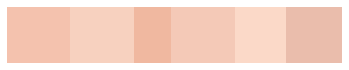

In [8]:
# 그래프 그리기 
bar = plot_colors(hist, temp)

plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [12]:
print(hist)
print(type(hist))

[0.1871366  0.19353452 0.11003399 0.18962411 0.15550528 0.16416551]
<class 'numpy.ndarray'>


In [11]:
print(temp)

[[244.10084867 194.97211507 174.74154084]
 [247.61605206 209.52182424 191.38749273]
 [240.28109498 184.8634944  160.3804887 ]
 [244.51827852 201.74901453 183.56752524]
 [251.33315779 217.1492331  200.19616878]
 [234.83653065 189.99656314 172.03205649]]


In [167]:
colors=plot_colors(hist, temp)

In [168]:
colors_mean = colors.mean(axis=0)
a = colors_mean.mean(axis=0,dtype=int)
print(a)

[243 199 180]


In [169]:
aa = a.tolist()
print(aa)

[243, 199, 180]


In [170]:
import colorsys


# RGB -> HSV
def revised_rgb_to_hsv(r, g, b):
    (h, s, v) = colorsys.rgb_to_hsv(r/255, g/255, b/255)
    h *= 360
    s *= 100
    v *= 100
    return round(h), round(s), round(v)


In [171]:
hsv = revised_rgb_to_hsv(aa[0], aa[1], aa[2])
#hsv = np.array(hsv)
print(hsv)

(18, 26, 95)


In [172]:
data = pd.read_excel('data2.xlsx', index_col='순번')
data.head()

,H,S,V,R,G,B,l,a,b,계절,봄,여름,가을,겨울,쿨웜
순번,,,,,,,,,,,,,,,
1,7,11,84,215,194,191,80,7,4,1,1,0,0,0,1
2,354,50,85,218,108,119,59,45,15,1,1,0,0,0,1
3,11,65,85,218,103,76,58,45,38,1,1,0,0,0,1
4,1,65,82,210,76,73,52,54,32,1,1,0,0,0,1
5,36,79,83,211,143,44,65,21,60,1,1,0,0,0,1


In [ ]:
# 층 2개 쌓아서 딥러닝으로 돌려보기

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()


x_data = data[['H', 'S', 'V']]
y_data = data['쿨웜']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=777)

#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

model = LogisticRegression()

model.fit(x_train, y_train)


print(model.score(x_test, y_test))

0.7361111111111112


In [117]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [184]:
hsv = np.array(hsv)
min_hsv = np.array([0, 0, 0])
max_hsv = np.array([359, 100, 100])

sample = np.array([hsv, min_hsv, max_hsv])

#정규화
sample = scaler.transform(sample)

In [185]:
predict = model.predict(sample)
predict_proba = model.predict_proba(sample)
print(predict)
print(predict_proba)

[0 0 1]
[[0.50207492 0.49792508]
 [0.50775818 0.49224182]
 [0.4900173  0.5099827 ]]


In [186]:
if predict[0]==0:
    print("쿨톤일 확률이 {:.2f}% 입니다.".format(predict_proba[0][0]*100))
else:
    print("웜톤일 확률이 {:.2f}% 입니다.".format(predict_proba[0][1]*100))

쿨톤일 확률이 50.21% 입니다.


([array([1., 1., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([1., 0., 1., 0., 0., 1., 0., 0., 0., 0.]),
  array([1., 0., 2., 0., 0., 0., 0., 0., 0., 0.]),
  array([3., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([2., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 2., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 2., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([2., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 1., 0., 0., 0., 1., 0., 0., 0.]),
  array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([2., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 1., 0., 0., 0., 0., 0., 0., 1., 0.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 2., 0., 0., 0.

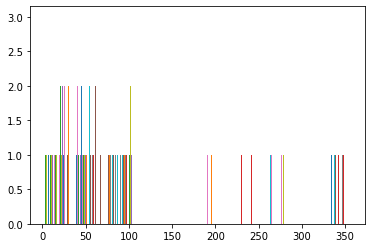

In [187]:
plt.hist(x_train)

In [178]:
x_train

array([[ 0.79892734, -1.09653862, -0.90753964],
       [ 0.07714841, -1.02276329,  0.77182585],
       [-1.27819201,  1.11672137,  0.97175031],
       ...,
       [ 1.32823188,  0.8585077 , -0.10784179],
       [ 1.40040978,  1.04294603, -2.10708642],
       [ 0.94328312, -1.35475229, -1.26740368]])